Dataset shape: (7043, 33)
Columns: ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   L

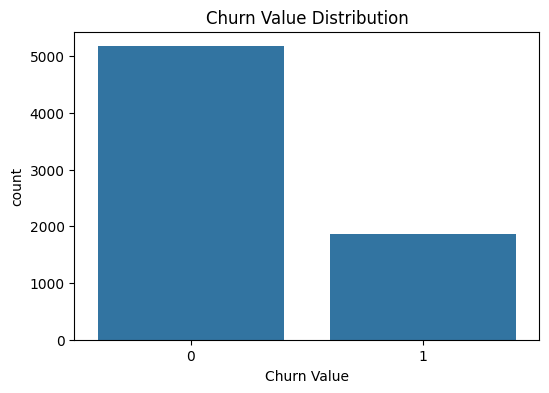

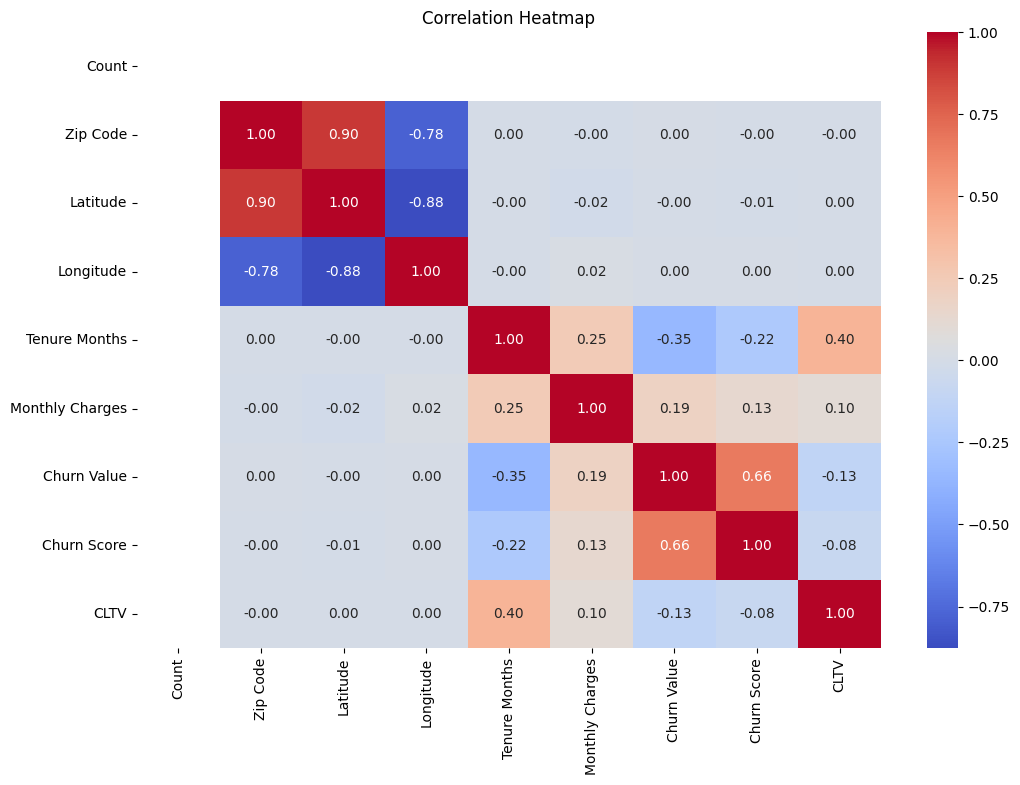

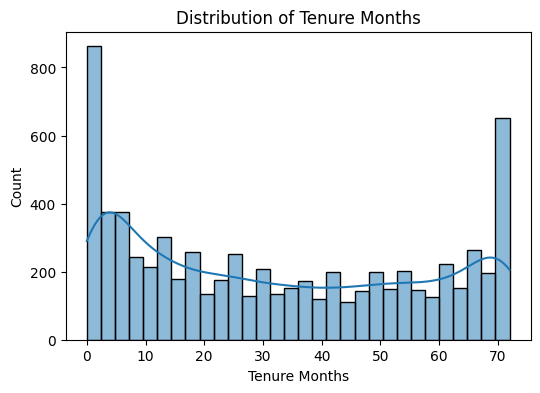

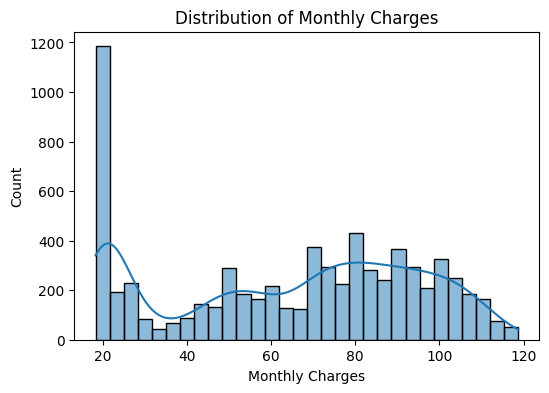

ValueError: Unable to parse string " " at position 2234

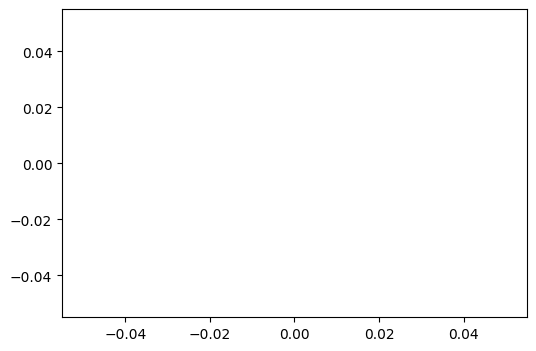

In [1]:
# 01_eda.ipynb
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("../data/raw/Telecom_churn.xlsx")

# Display basic info
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics
print("\nDescriptive statistics:")
print(df.describe())

# Target variable distribution
plt.figure(figsize=(6,4))
if 'Churn Value' in df.columns:
    sns.countplot(x='Churn Value', data=df)
    plt.title("Churn Value Distribution")
else:
    sns.countplot(x='Churn Label', data=df)
    plt.title("Churn Label Distribution")
plt.show()

# Correlation heatmap for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution plots for selected numerical features
num_features = ['Tenure Months', 'Monthly Charges', 'Total Charges']
for col in num_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()

# Count plots for categorical features
cat_features = ['Gender', 'Internet Service', 'Contract', 'Payment Method']
for col in cat_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, data=df)
        plt.title(f"{col} Distribution")
        plt.xticks(rotation=45)
        plt.show()
